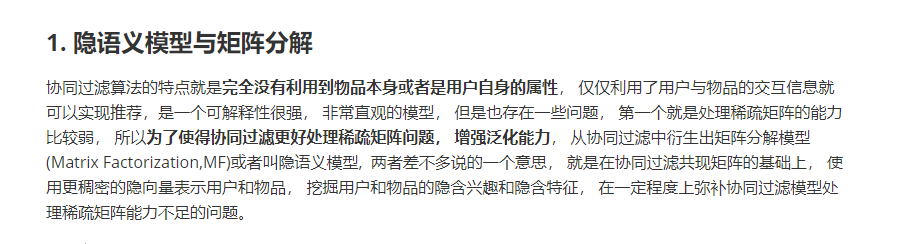

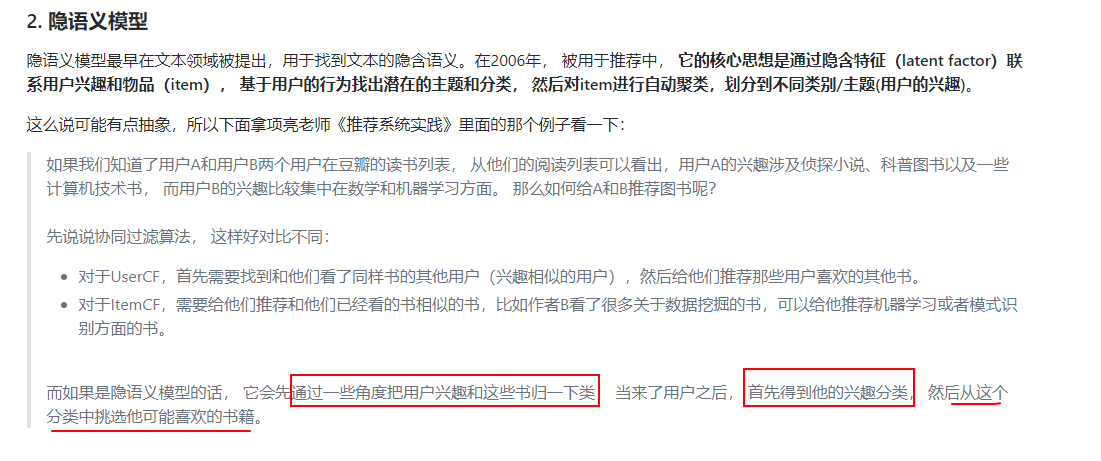

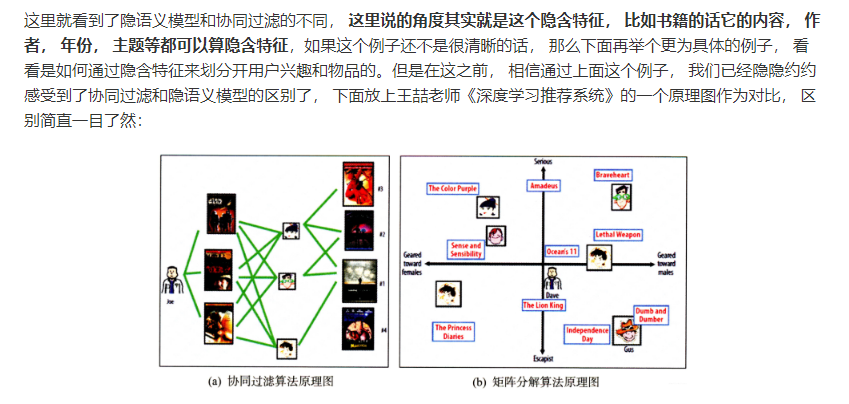

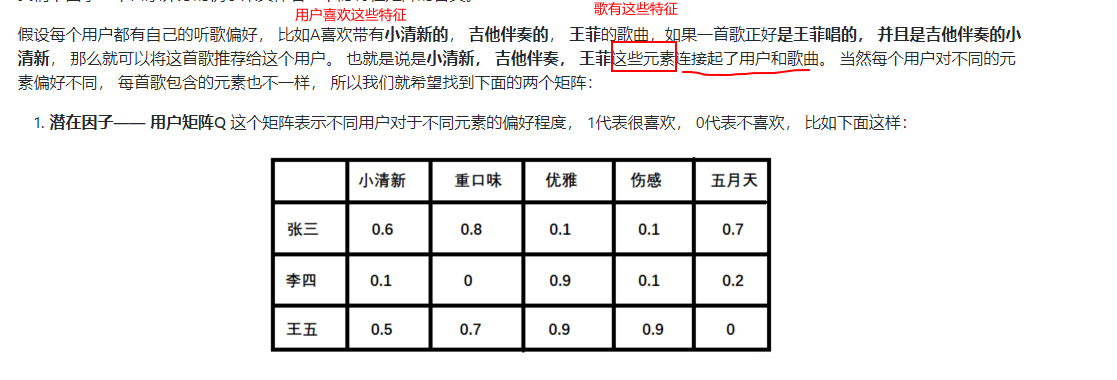

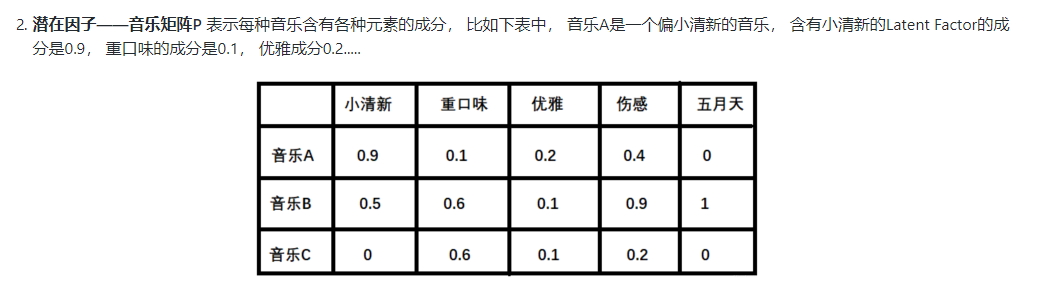

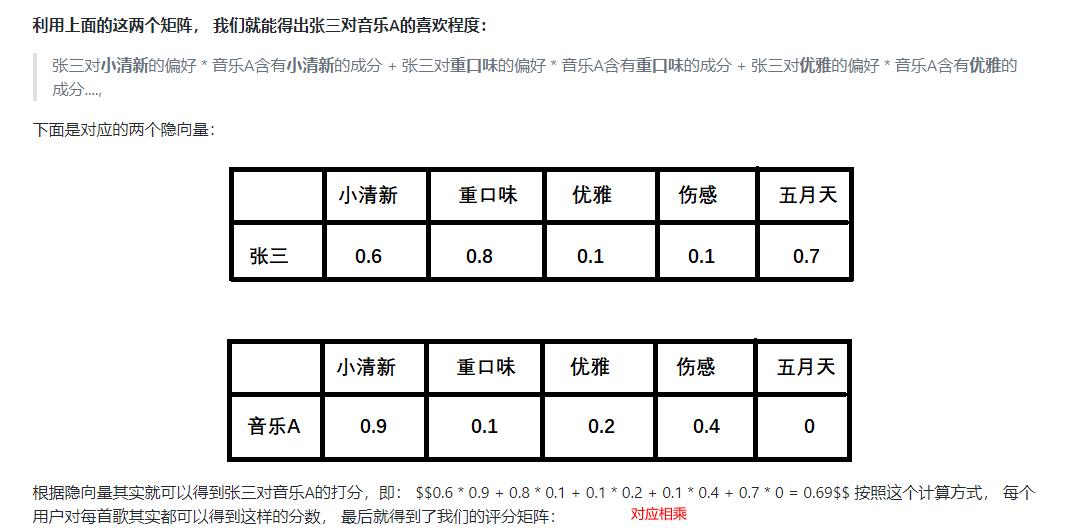

###  下图的理解

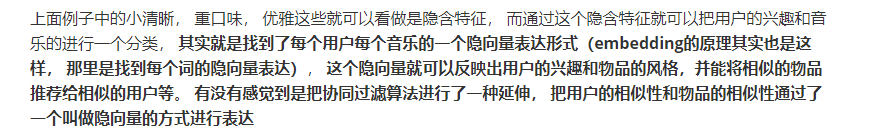

###  基于 userCF 的角度
这里可以把“隐向量”理解成一种 桥梁。 以前说两个人相似，A 听了 这些歌， B 也听了这些歌，所以A与B相似。现在是对这些歌，进行“抽象化”了。

这些歌都有自己的“标签”，小清新，重口味等等。   现在说，A喜欢听 小清新 的歌， B也喜欢听小清新的歌，A 与 B相似。

对那些歌来说，也是同样的思路：
###  基于 itemCF 的角度
以前说，在所有人群中，这些歌被很多人同时喜欢，所以 判定这些歌是 相似的。现在是，这些歌的都有很多标签，每个标签上会有得分，可以依据标签来计算
相似度。

###  总结：隐向量，是 人 与 物 之间的一种桥梁，一种抽象化的表达。通过 隐向量 可以沟通人与物。

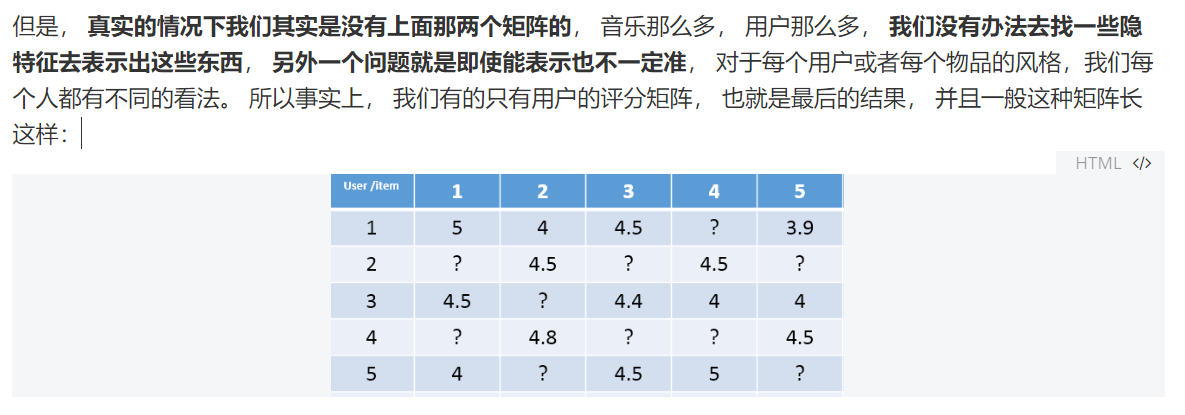

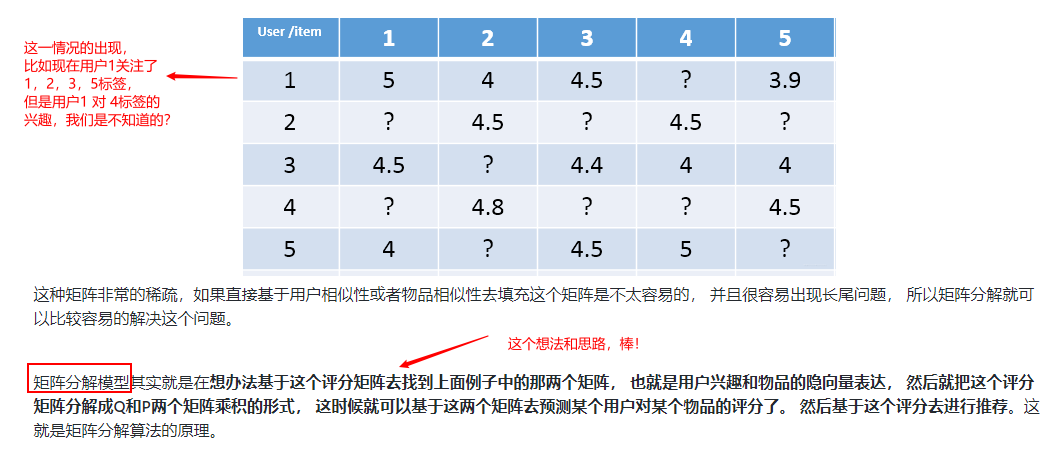

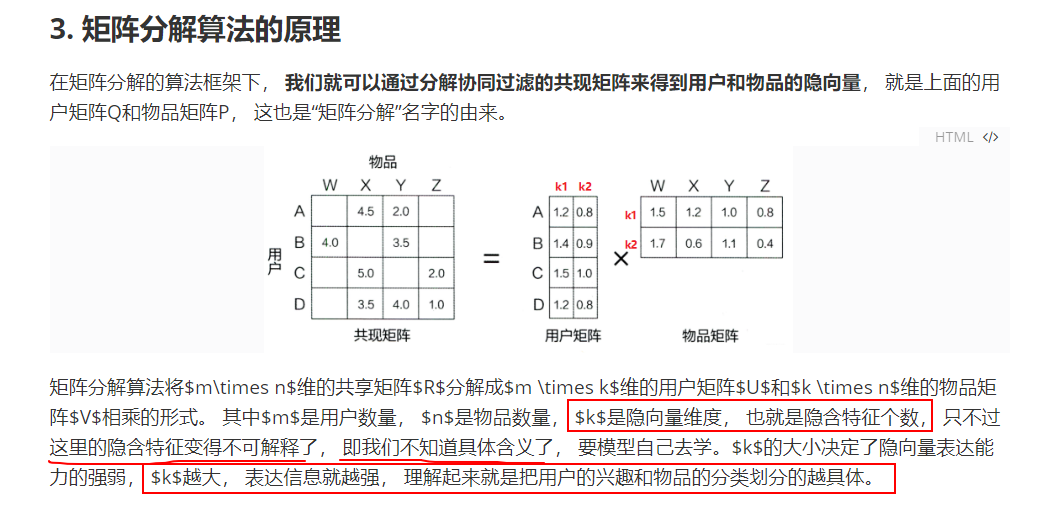

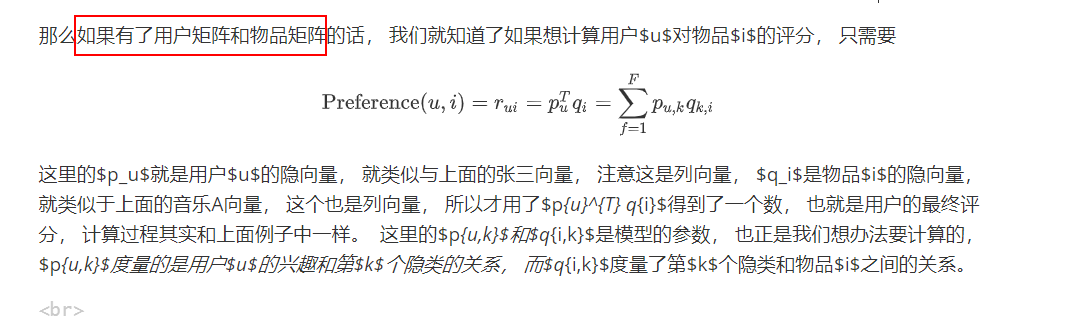

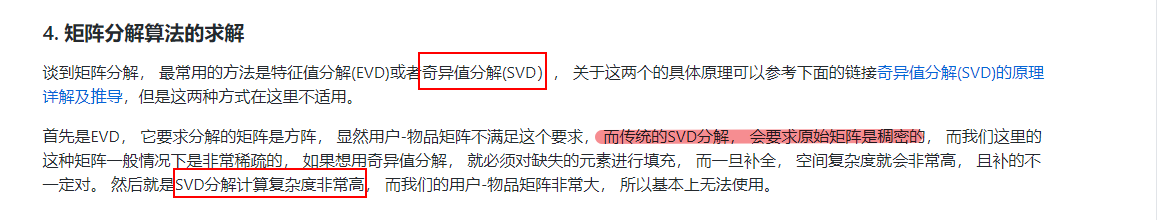

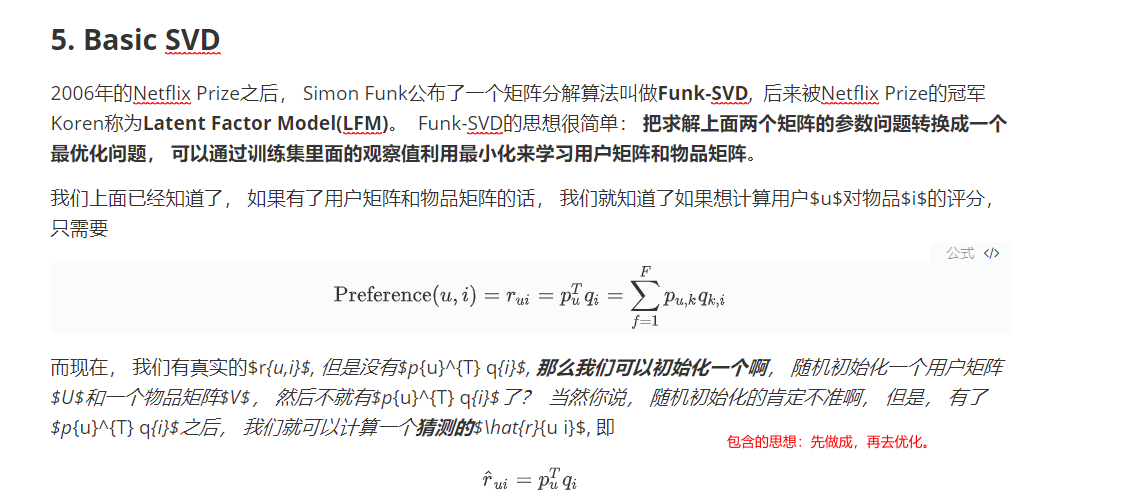

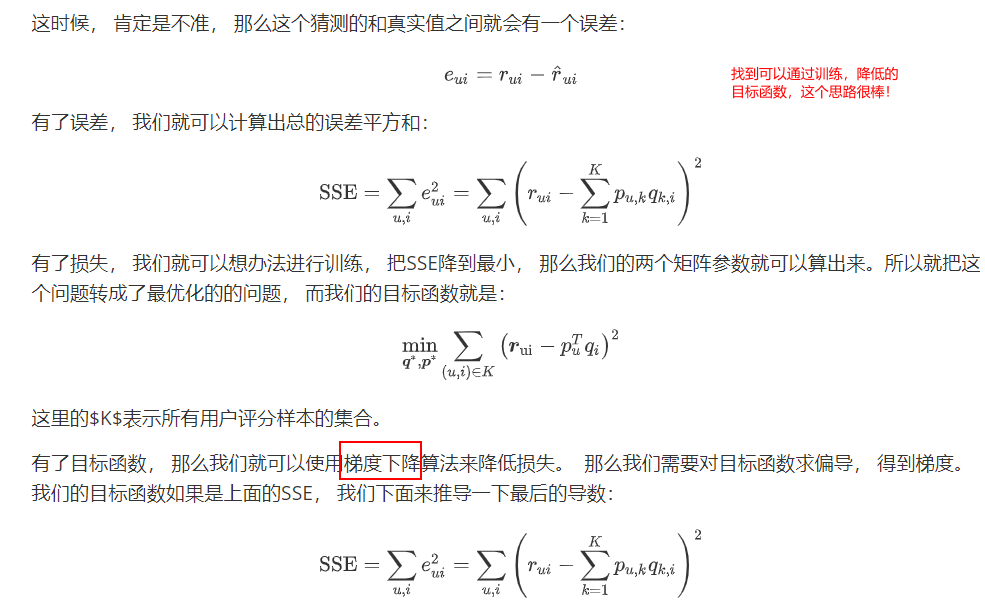

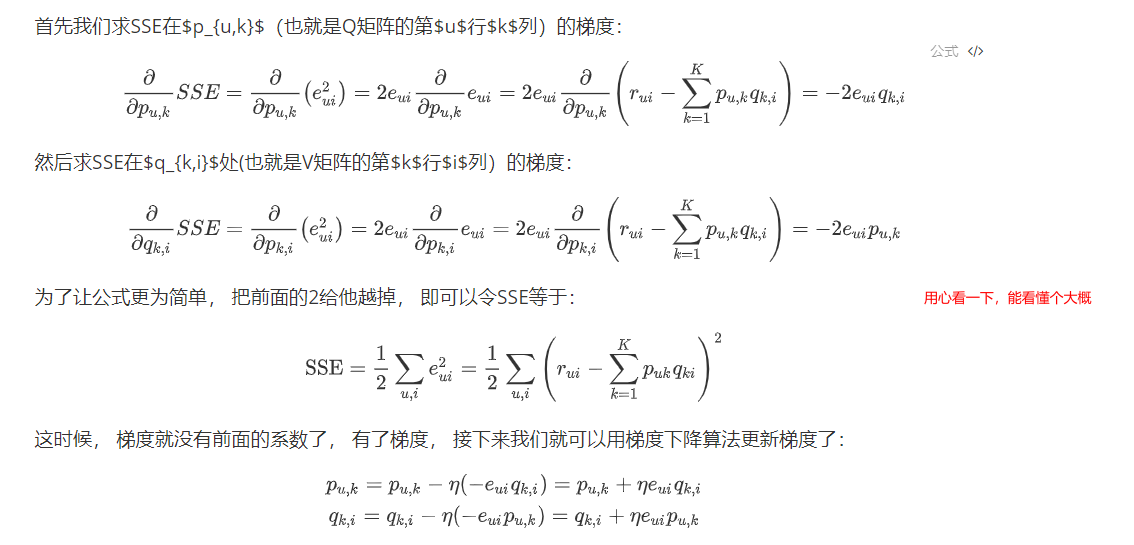

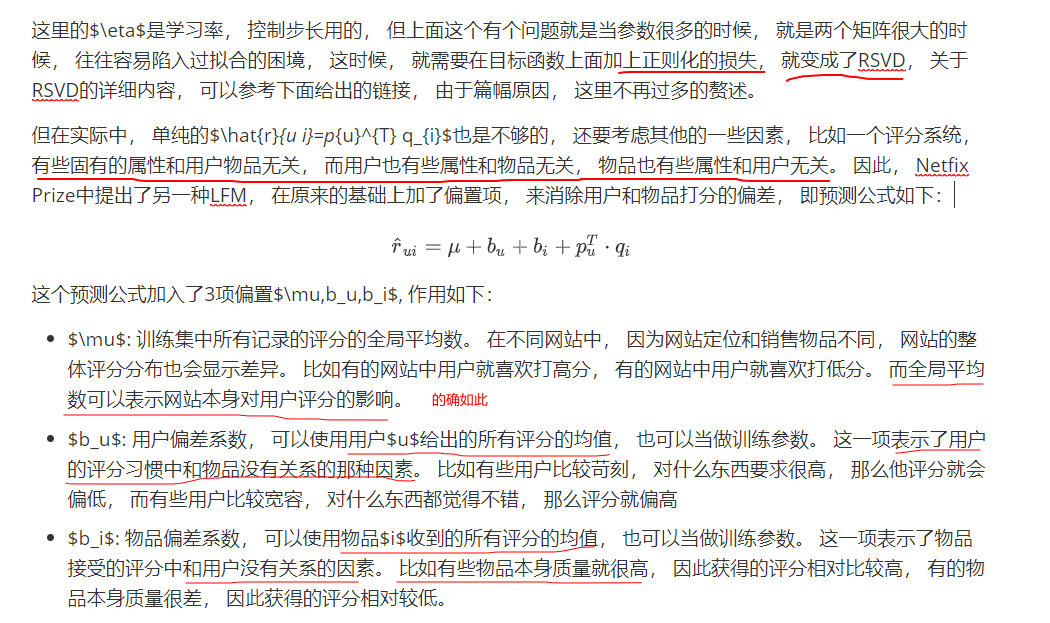

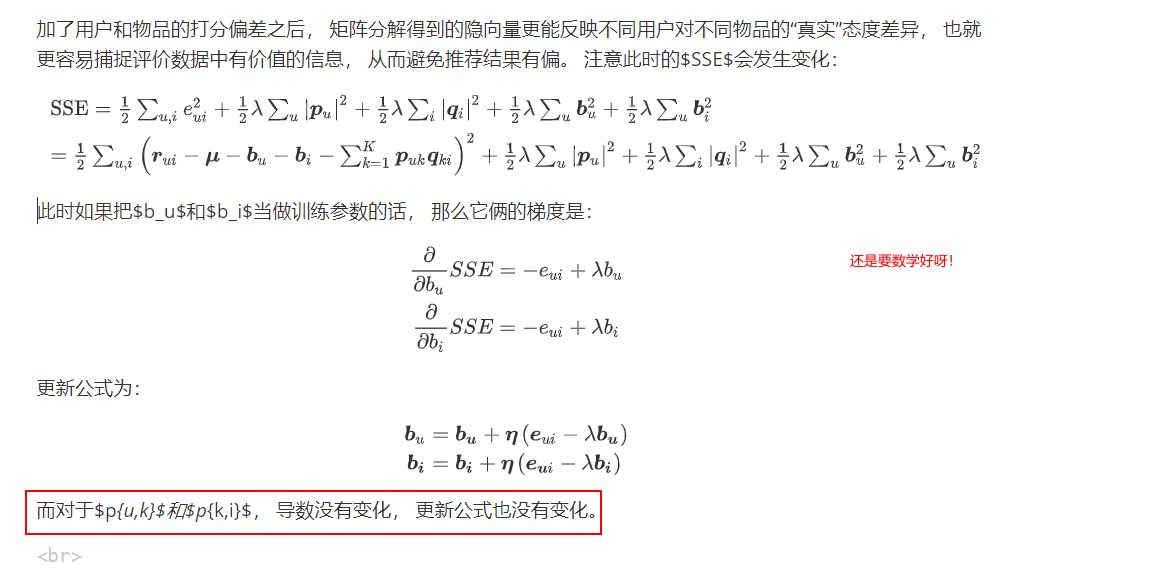

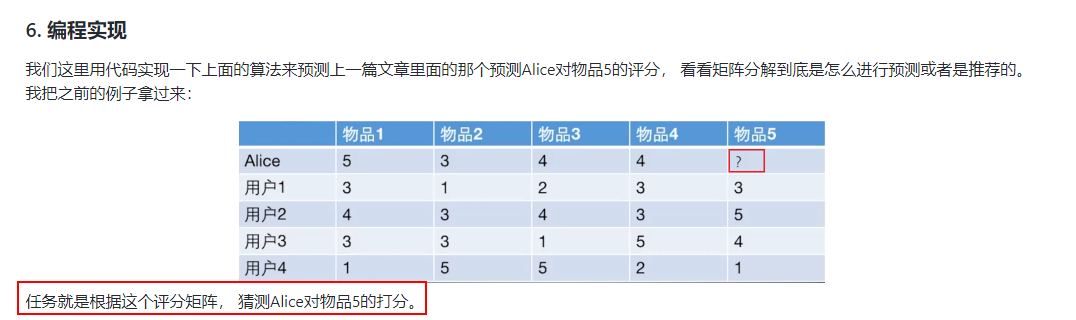

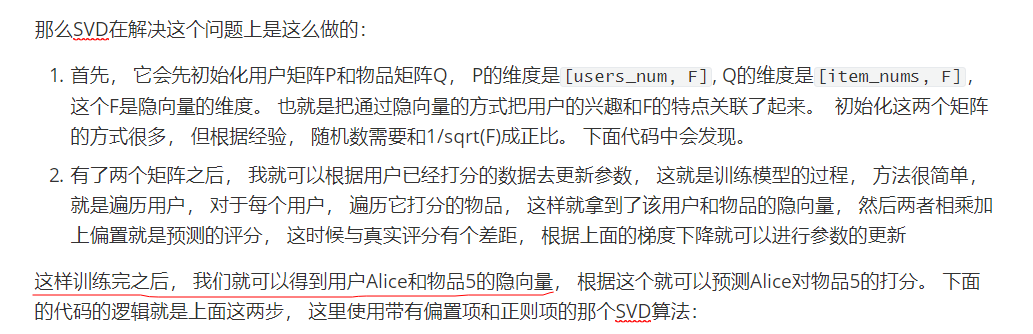

In [7]:
import random
import math

In [50]:
class SVD():
    def __init__(self, rating_data, F=5, alpha=0.1, lmbda=0.1, max_iter=100):
        self.F = F           # 这个表示隐向量的维度
        self.P = dict()          #  用户矩阵P  大小是[users_num, F]
        self.Q = dict()     # 物品矩阵Q  大小是[item_nums, F]
        self.bu = dict()   # 用户偏差系数
        self.bi = dict()    # 物品偏差系数
        self.mu = 0.0        # 全局偏差系数
        self.alpha = alpha   # 学习率
        self.lmbda = lmbda    # 正则项系数
        self.max_iter = max_iter    # 最大迭代次数
        self.rating_data = rating_data # 评分矩阵
        
        # 初始化矩阵P和Q, 方法很多， 一般用随机数填充， 但随机数大小有讲究， 根据经验， 随机数需要和1/sqrt(F)成正比
        cnt = 0    # 统计总的打分数， 初始化mu用
        for user, items in self.rating_data.items():
            self.P[user] = [random.random() / math.sqrt(self.F)  for x in range(0, F)]
            self.bu[user] = 0
            cnt += len(items) 
            for item, rating in items.items():
                if item not in self.Q:
                    self.Q[item] = [random.random() / math.sqrt(self.F) for x in range(0, F)]
                    self.bi[item] = 0
        self.mu /= cnt
        
    # 有了矩阵之后， 就可以进行训练, 这里使用随机梯度下降的方式训练参数P和Q
    def train(self):
        for step in range(self.max_iter):
            for user, items in self.rating_data.items():
                for item, rui in items.items():
                    rhat_ui = self.predict(user, item)   # 得到预测评分
                    # 计算误差
                    e_ui = rui - rhat_ui
                    
                    self.bu[user] += self.alpha * (e_ui - self.lmbda * self.bu[user])  # 更新用户偏差系数
                    self.bi[item] += self.alpha * (e_ui - self.lmbda * self.bi[item])  # 更新物品偏差系数
                    # 随机梯度下降更新梯度
                    for k in range(0, self.F):
                        self.P[user][k] += self.alpha * (e_ui*self.Q[item][k] - self.lmbda * self.P[user][k])  #加入了正则项
                        self.Q[item][k] += self.alpha * (e_ui*self.P[user][k] - self.lmbda * self.Q[item][k])  #加入了正则项
                    
            self.alpha *= 0.1    # 每次迭代步长要逐步缩小
    
    # 预测user对item的评分， 这里没有使用向量的形式
    def predict(self, user, item):
        return sum(self.P[user][f] * self.Q[item][f] for f in range(0, self.F)) + self.bu[user] + self.bi[item] + self.mu   
# 下面我建立一个字典来存放数据， 之所以用字典， 是因为很多时候矩阵非常的稀疏， 如果用pandas的话， 会出现很多Nan的值， 反而不好处理。

# 定义数据集， 也就是那个表格， 注意这里我们采用字典存放数据， 因为实际情况中数据是非常稀疏的， 很少有情况是现在这样
def loadData():
    rating_data={1: {'A': 5, 'B': 3, 'C': 4, 'D': 4},
           2: {'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 3},
           3: {'A': 4, 'B': 3, 'C': 4, 'D': 3, 'E': 5},
           4: {'A': 3, 'B': 3, 'C': 1, 'D': 5, 'E': 4},
           5: {'A': 1, 'B': 5, 'C': 5, 'D': 2, 'E': 1}
          }
    return rating_data
 
# 接下来就是训练和预测
rating_data = loadData()
basicsvd = SVD(rating_data, F=10)
basicsvd.train()
for item in ['E']:
    print(item, basicsvd.predict(1, item))


## 结果：
# E 3.252210242858994

E 3.3581054323592574


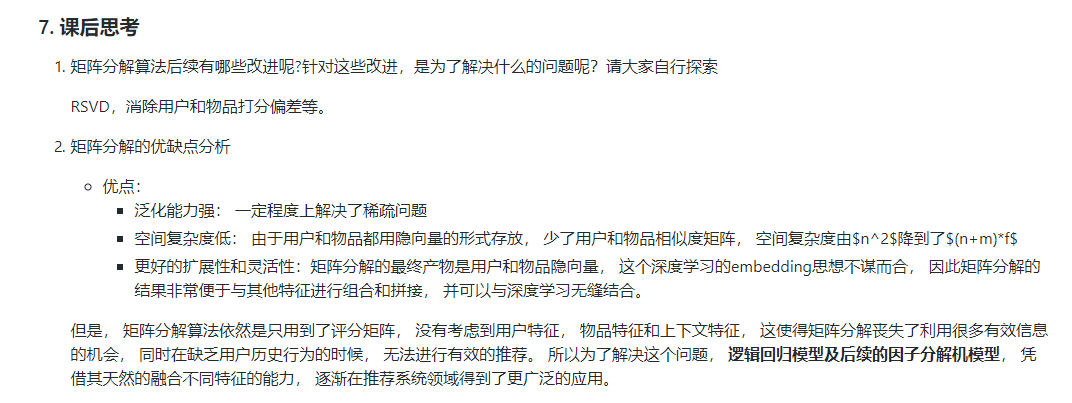